In [1]:
# Capstone A Project - Spring 2020
# Kaggle Attrition data - Exploratory Data Analysis Python Code 
# Reference URL:  https://www.kaggle.com/abhishektibrewal/hr-employee-attrition

# data transformation
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime

# data plotting
import seaborn as sns
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# classification & correlation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mt
#import xgboost as xgb




C:\Users\shayden\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [2]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf



print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

C:\Users\shayden\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shayden\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shayden\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shayden\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

Tensor Flow Version: 1.13.1
Keras Version: 2.2.4-tf

Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas 1.0.1
Scikit-Learn 0.22.1
GPU is NOT AVAILABLE


In [3]:
## Importing data from an Excel file:
## Prior to loading the file, convert it to csv in Excel 
## Setting datatypes prior to load

## updated data types to match types in IBM's as listed here:  
## http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

datatypes = {
"Age": "int",
"Attrition": "category",
"BusinessTravel": "category",
"DailyRate": "int",
"Department": "category",
"DistanceFromHome": "int",
"Education": "int", ## changed to int
"EducationField": "category",
"EmployeeCount": "int",
"EmployeeNumber": "int",
"EnvironmentSatisfaction": "int", ## changed
"Gender": "category",
"HourlyRate": "int",
"JobInvolvement": "int", ## changed
"JobLevel": "int", #changed
"JobRole": "category",
"JobSatisfaction": "int", ## changed
"MaritalStatus": "category",
"MonthlyIncome": "int",
"MonthlyRate": "int",
"NumCompaniesWorked": "int",
"Over18": "category",
"OverTime": "category",
"PercentSalaryHike": "float",
"PerformanceRating": "int", ## changed
"RelationshipSatisfaction": "int", ## changed
"StandardHours": "int",
"StockOptionLevel": "int",  ## changed
"TotalWorkingYears": "int",
"TrainingTimesLastYear": "int",
"WorkLifeBalance": "int", #changed
"YearsAtCompany": "int",
"YearsInCurrentRole": "int",
"YearsSinceLastPromotion": "int",
"YearsWithCurrManager": "int"
}

df = pd.read_csv('https://raw.githubusercontent.com/skhayden/SMU-Capstone-Age-Bias-in-Predictive-Modeling-/master/WA_Fn-UseC_-HR-Employee-Attrition.csv',low_memory=False)


# Verifying the upload of the data looking at the first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Verifying the upload of the data looking at the last 5 rows

df.tail()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
# Verifying the dimensions of the data set - (rows, cols)

df.shape

(1470, 35)

In [6]:
# Check what data types the features are

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Retrieve simple statistics from the data set

df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Exploring our Age feature

df.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [10]:
# Exploring our Age feature

df.Age.value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [21]:
min(df['Age'])

18

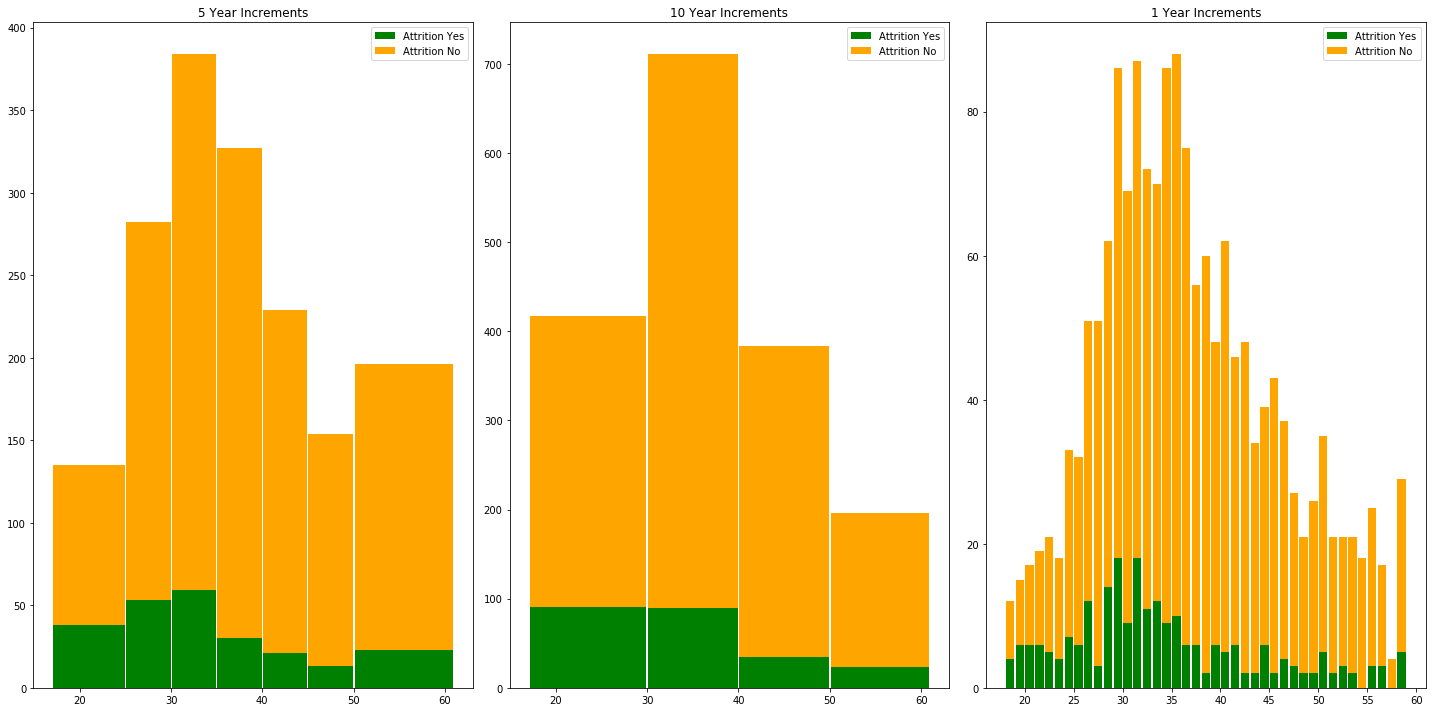

In [25]:
#decade increments
bin_labels10 = ['<=30', '>30 & <=40', '>40 & <=50', '>50']
bins10 = [(min(df['Age'])-1), 30, 40, 50, (max(df['Age'])+1)]
df['Age_group_Decade'] = pd.cut(df['Age'], bins=bins10, labels=bin_labels10)


#half decade increments
bin_labels5 = ['<=25', '>25 & <=30','>30 & <=35','>35 & <=40','>40 & <=45','>45 & <=50','>50']
bins5 = [(min(df['Age'])-1), 25, 30, 35, 40, 45, 50, (max(df['Age'])+1)]
df['Age_group_half_Decade'] = pd.cut(df['Age'], bins=bins5, labels=bin_labels5)

#year increments
bin_labels1 = list(range(min(df['Age']),max(df['Age'])))
bins1 = list(range(min(df['Age']),max(df['Age'])))
df['Age_group_Year'] = pd.cut(df['Age'], bins=bins1, labels=bin_labels1[0:len(bin_labels1)-1])



fig, ((ax0, ax1,ax2)) = plt.subplots( ncols=3,figsize=(20, 10))

ax0.hist([df['Age'].loc[df['Attrition']=='Yes'],
          df['Age']],bins=bins5, stacked=True,color=['green', 'orange'], 
          rwidth=0.98,label=['Attrition Yes', 'Attrition No'])
ax0.set_title('5 Year Increments')
ax0.legend(prop={'size': 10})

ax1.hist([df['Age'].loc[df['Attrition']=='Yes'],
          df['Age']],bins=bins10, stacked=True,color=['green', 'orange'], 
          rwidth=0.98,label=['Attrition Yes', 'Attrition No'])
ax1.set_title('10 Year Increments')
ax1.legend(prop={'size': 10})

ax2.hist([df['Age'].loc[df['Attrition']=='Yes'],
          df['Age']],bins=bins1, stacked=True,color=['green', 'orange'], 
          rwidth=0.85,label=['Attrition Yes', 'Attrition No'])
ax2.set_title('1 Year Increments')
ax2.legend(prop={'size': 10})

fig.tight_layout()
plt.show()


In [26]:
idx = pd.IndexSlice
#10 year perc
Agedf10=df.groupby(['Age_group_Decade', 'Attrition']).agg({'Attrition': 'count'})
Age10_pcts = Agedf10.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
#5 year perc
Agedf5=df.groupby(['Age_group_half_Decade', 'Attrition']).agg({'Attrition': 'count'})
Age5_pcts = Agedf5.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

#1 year perc
Agedf1=df.groupby(['Age_group_Year', 'Attrition']).agg({'Attrition': 'count'})
Age1_pcts = Agedf1.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))






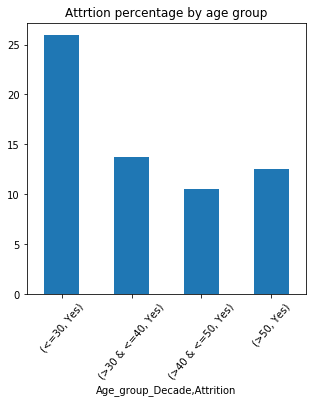

In [27]:

Age10_pcts.loc[idx[:, ['Yes']], idx['Attrition']].plot.bar(figsize=(5, 5),layout=(2, 2),
                title='Attrtion percentage by age group',rot=50)


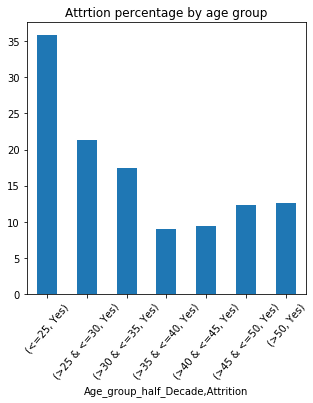

In [28]:
Age5_pcts.loc[idx[:, ['Yes']], idx['Attrition']].plot.bar(figsize=(5, 5),layout=(2, 2),
                title='Attrtion percentage by age group',rot=50)


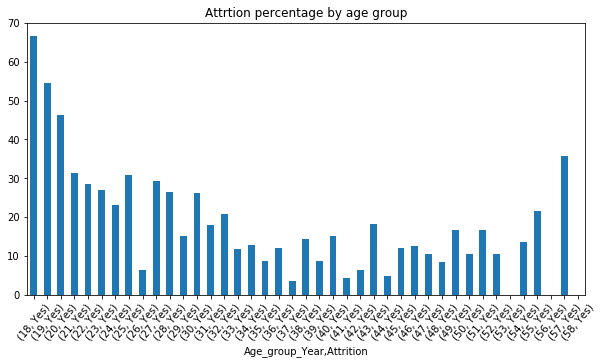

In [29]:
Age1_pcts.loc[idx[:, ['Yes']], idx['Attrition']].plot.bar(figsize=(10, 5),
                    layout=(2, 2),title='Attrtion percentage by age group',
                    rot=50)


In [30]:
## In order to get familiarized with data set, we are displaying categorical frequency groupings for:
## categorical features 
## some numerical features with levels 
## target label (Y - Attrition)

##### Categorical Features   #####

## Attrition Frequency
df_byAttrition = df.groupby(['Attrition'])
print(df_byAttrition.Attrition.count())
print(" ")
print(" ")

## BusinessTravel Frequency
df_byBusinessTravel = df.groupby(['BusinessTravel'])
print(df_byBusinessTravel.BusinessTravel.count())
print(" ")
print(" ")

## Department Frequency
df_byDepartment = df.groupby(['Department'])
print(df_byDepartment.Department.count())
print(" ")
print(" ")

## Education Field Frequency Table
df_byEducationField = df.groupby(['EducationField'])
print(df_byEducationField .EducationField.count())
print(" ")
print(" ")

## Gender Frequency Table
df_byGender = df.groupby(['Gender'])
print(df_byGender.Gender.count())
print(" ")
print(" ")

## JobRole Frequency Table
df_byJobRole = df.groupby(['JobRole'])
print(df_byJobRole.JobRole.count())
print(" ")
print(" ")

## MaritalStatus  Frequency Table
df_byMaritalStatus  = df.groupby(['MaritalStatus'])
print(df_byMaritalStatus.MaritalStatus.count())
print(" ")
print(" ")

## Over18  Frequency Table
df_byOver18  = df.groupby(['Over18'])
print(df_byOver18.Over18.count())
print(" ")
print(" ")

## OverTime  Frequency Table
df_byOverTime  = df.groupby(['OverTime'])
print(df_byOverTime.OverTime.count())
print(" ")
print(" ")





#### Numerical features with levels  ####
print("Numerical features with levels")
print(" ")
print(" ")



## Education Frequency
df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

## df_byEnvironmentSatisfaction Frequency Table
df_byEnvironmentSatisfaction = df.groupby(['EnvironmentSatisfaction'])
print(df_byEnvironmentSatisfaction.EnvironmentSatisfaction.count())
print(" ")
print(" ")

## JobInvolvement Frequency Table
df_byJobInvolvement = df.groupby(['JobInvolvement'])
print(df_byJobInvolvement.JobInvolvement.count())
print(" ")
print(" ")

## JobLevel Frequency Table
df_byJobLevel = df.groupby(['JobLevel'])
print(df_byJobLevel.JobLevel.count())
print(" ")
print(" ")

## JobSatisfaction Frequency Table
df_byJobSatisfaction = df.groupby(['JobSatisfaction'])
print(df_byJobSatisfaction.JobSatisfaction.count())
print(" ")
print(" ")

## PerformanceRating  Frequency Table
df_byPerformanceRating  = df.groupby(['PerformanceRating'])
print(df_byPerformanceRating.PerformanceRating.count())
print(" ")
print(" ")

## RelationshipSatisfaction  Frequency Table
df_byRelationshipSatisfaction  = df.groupby(['RelationshipSatisfaction'])
print(df_byRelationshipSatisfaction.RelationshipSatisfaction.count())
print(" ")
print(" ")

## StockOptionLevel  Frequency Table
df_byStockOptionLevel  = df.groupby(['StockOptionLevel'])
print(df_byStockOptionLevel.StockOptionLevel.count())
print(" ")
print(" ")

## WorkLifeBalance  Frequency Table
df_byWorkLifeBalance  = df.groupby(['WorkLifeBalance'])
print(df_byWorkLifeBalance.WorkLifeBalance.count())
print(" ")
print(" ")



Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
 
 
BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: BusinessTravel, dtype: int64
 
 
Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64
 
 
EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
Name: EducationField, dtype: int64
 
 
Gender
Female    588
Male      882
Name: Gender, dtype: int64
 
 
JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
Name: JobRole, dtype: int64
 
 
MaritalStatus
Divorced    327
Married     673
Single      470
N

In [31]:
## Reducing levels in Education feature from 5(five) to 4 (four) levels

df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

i = 0
while (i < df.Education.count()):
   ##print ("The Education value is:", df.Education[i])
   if df.Education[i] == 5:
     df.Education[i] = 4
   i = i + 1


df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

Education
1    170
2    282
3    572
4    446
Name: Education, dtype: int64
 
 
Education
1    170
2    282
3    572
4    446
Name: Education, dtype: int64
 
 


Create the target with a binary flag. 1 indicates that they left, and 0 indicates they did not. 

In [32]:
#OneHotdf.columns
#list(df.select_dtypes(exclude = 'int64').columns)
#Categorical_Columns= list(df.select_dtypes(exclude = 'int64').columns)
#Categorical_Columns=Categorical_Columns[0:len(Categorical_Columns)-3]
#Categorical_Columns
#Categorical_Columns[0:len(Categorical_Columns)-3]

In [33]:
#save transformed date to csv
#df.to_csv('AttritionDataFrame.csv')

In [ ]:
####### Steven One hot encouding 

exclude=df.select_dtypes('int64').columns

#get columns to onehot encoude
Numeric_Columns=list(df.select_dtypes('int64').columns)
Categorical_Columns= list(df.select_dtypes(exclude = 'int64').columns)

               
########
#onehot
OneHotdf = pd.get_dummies(df[Categorical_Columns].drop(['Attrition',
                                'Age_group_Decade','Age_group_half_Decade',
                                'Age_group_Year'],axis=1))

#remove binary varible that is duplicated
OneHotdf = OneHotdf.drop(['OverTime_No','Gender_Male'],axis=1)

#df=df.drop(Categorical_Columns,axis=1)
df = pd.concat([df,OneHotdf], axis=1)


#create target 
df['Target_Attrition_Flag'] = np.where(df['Attrition']=='Yes', 1, 0)


In [ ]:
## Preprocessing, Label Encoding Attrition, the Target Label, and non-numerical value features to add to correlation matrix and
## AttritionOne will be used as the Target label in  XGBoster classifier


le = preprocessing.LabelEncoder()

AttritionOne       = le.fit_transform(df.Attrition)
BusinessTravelOne  = le.fit_transform(df.BusinessTravel)
DepartmentOne      = le.fit_transform(df.Department)
EducationFieldOne  = le.fit_transform(df.EducationField)
GenderOne          = le.fit_transform(df.Gender)
JobRoleOne         = le.fit_transform(df.JobRole)
MaritalStatusOne   = le.fit_transform(df.MaritalStatus)
Over18One          = le.fit_transform(df.Over18)
OverTimeOne        = le.fit_transform(df.OverTime)



df2 = pd.DataFrame({'AttritionOne':AttritionOne.tolist(),
                    'BusinessTravelOne':BusinessTravelOne.tolist(),
                    'DepartmentOne':DepartmentOne.tolist(),
                    'EducationFieldOne':EducationFieldOne.tolist(),
                    'GenderOne':GenderOne.tolist(),
                    'JobRoleOne':JobRoleOne.tolist(),
                    'MaritalStatusOne':MaritalStatusOne.tolist(),
                    'Over18One':Over18One.tolist(),
                    'OverTimeOne':OverTimeOne.tolist()
                   })

df3 = pd.concat([df, df2], axis=1)

## print(df2.AttritionOne)




In [ ]:
df2.AttritionOne

In [ ]:
df3.info()

In [ ]:
# Let's explore correlations between features

corr = df3.corr()
corr

In [ ]:
# Mapping feature correlation with a Seaborn heatmap  
# Referenced tutorial:  https://riptutorial.com/seaborn/example/31922/basic-correlation-plot

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, 
        cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, 
        center=0,
        vmin=-1)

Create group attribute for age



df.loc[df['Age'] < 20, 'Age_Group'] = '<20'
df.loc[(df['Age'] >=20 ) & (df['Age'] < 30), 'Age_Group'] = '>=20 & <30'
df.loc[(df['Age'] >=30 ) & (df['Age'] < 40), 'Age_Group'] = '>=30 & <40'
df.loc[(df['Age'] >=40 ) & (df['Age'] < 50), 'Age_Group'] = '>=40 & <50'
df.loc[(df['Age'] >=50 ), 'Age_Group'] = '>=50'


#### Splitting Data and Training Model

Create training and testing data set. This is also where we included and excluded "**Age**"

In [ ]:
#drop Categrical columns that have dummie columns
df=df.drop(Categorical_Columns[:-3],axis=1)
#remove vars from trainning either for bias or target value
# This is where you remove "Age" by including in the line below.
Columns_to_drop_for_Training=['Target_Attrition_Flag','Age_group_Year', 'Age_group_Decade','Age_group_half_Decade','Age','Over18_Y']

# Split into train/test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(Columns_to_drop_for_Training,axis=1), df['Target_Attrition_Flag'], test_size=0.25)	


In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape )

### Baseline model

In [ ]:
#from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras import optimizers

 
#from tensorflow.keras.callbacks import EarlyStopping
#from keras.layers import LeakyReLU
#from sklearn import metrics
#from keras import optimizers





def define_predictor(n_input):
    leaky = lambda x: tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(25, input_dim = n_input, activation=leaky)) # Hidden 1
    model.add(tf.keras.layers.Dense(50, activation=leaky)) # Hidden 2

    ## We need a softmax but got an error, so we used sigmoid
    ## we want to have the right input for the adversary, i.e., to retrieve yhat for future input to the Adversary,
    model.add(tf.keras.layers.Dense(1,activation='sigmoid')) # Output #1.2
    #model.add(tf.keras.layers.Dense(1,activation='softmax')) # Output
    #sgd = tf.keras.optimizers.SGD(lr=.0001, decay=1e-6, momentum=0.4, nesterov=False)# Best parm so far
    model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
    return model
 



## try leakyReLu
#leaky = lambda x: tf.keras.layers.LeakyReLU(alpha=0.8)(x)


#model = Sequential()
#model.add(Dense(25, input_dim = X_train.shape[1], activation=leaky)) # Hidden 1

#model.add(Dense(10, activation=leaky)) # Hidden 2

#model.add(Dense(1,activation='sigmoid')) # Output

#sgd = tf.keras.optimizers.SGD(lr=.000001, decay=1e-6, momentum=0.7, nesterov=False)# Best parm so far
#model.compile(loss='binary_crossentropy', optimizer=sgd)

#adds an early stop incase the model gets stuck with higher epoch counts 
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3, 
                        #verbose=1, mode='auto', restore_best_weights=True)

    
#setup scaler
scaler = preprocessing.StandardScaler()

Att_model = define_predictor(X_train.shape[1])
Att_model.fit(scaler.fit_transform(X_train),np.array(y_train), verbose=2, epochs=1000, batch_size=64)
Att_model.summary()


In [ ]:
#print(tf.keras.__version__)

#p_model.get_weights()[4]

#### Break out age groups
We want to break out the age groups and compare their accuracy amongst each other to get an understanding of bias in the data set. 

In [ ]:
# get overall accuracy 
Overall_pred = pd.DataFrame(Att_model.predict(scaler.fit_transform(X_test)))
Overall_y_compare = y_test
Overall_score = metrics.accuracy_score(Overall_y_compare, Overall_pred.astype(np.int32))



In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape )

In [ ]:
#add back in age group 
X_test=pd.merge(X_test, df.drop(df.columns.difference(Columns_to_drop_for_Training), 1), left_index=True, right_index=True)


In [ ]:

#mean_squared_error for GANS model

#funtion to get accuracy accrossed groups in grouped data
def Group_accuracy (model,x_test,y_test,Grouping,Atts_not_in_training,Print):
    # This function calculates accuracy of the model and can calculate accuracy 
    #across several groups in the data. This give you information need to 
    #produce a confusion matrix 
    
    #x_test = Test data of the explanatory variables  
    #y_test = Test data of the target variable 
    #Grouping = The variable that contains the grouping of the 
        #data that this function will use to break out accuracy 
    #Atts_not_in_training = Attributes not in x_test that where 
        #not in x_test for training the model. 
    
    from sklearn.metrics import confusion_matrix
    #confusion_matrix(y_test, Overall_Att_pred.astype(np.int32))
    
    Preds={}
    y_compare={}
    score={}
    Conf = {}
    
      
    for group in list(x_test[Grouping].dropna().unique()):
        
        #Get only the actuals based on the index of the 
        # independent variables within the specified age group  
        Preds[group]=pd.DataFrame(model.predict(scaler.fit_transform(x_test.loc[x_test[Grouping]==group].drop(Atts_not_in_training,axis=1))))
        
        #Get scores for each age group
        y_compare[group] = pd.DataFrame(y_test[x_test.loc[x_test[Grouping] == group].index])
        #Get scores for each age group
        score[group] = metrics.accuracy_score(y_compare[group], Preds[group].astype(np.int32))
        Conf[group] =confusion_matrix(y_compare[group], Preds[group].astype(np.int32))
    if Print==True:
        
        for key in score.keys():
            print("Age group "+ str(key) + " :{}".format(str(round((score[key]*100), 2))))
            print(Conf[key]) 

    return score


In [ ]:
### Overall accuracy 
print("Overall accuracy of the model: {}".format(str(Overall_score))) 

#Get the predictions for only specified age groups
print('Age_group_Decade')
Decade_score=Group_accuracy (Att_model,X_test,y_test,'Age_group_Decade',Columns_to_drop_for_Training,True)  

print('Age_group_half_Decade')
Half_Decade_score=Group_accuracy (Att_model,X_test,y_test,'Age_group_half_Decade',Columns_to_drop_for_Training,True)
#print('Age_group_Year')
#Year_score=Group_accuracy (p_model,X_test,y_test,'Age_group_Year',Columns_to_drop_for_Training,True)




overall confusion Matrix

In [ ]:
#overall Conf Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Overall_pred.astype(np.int32))
#X_test['Age_group_half_Decade'].unique()
#X_test.column



In [ ]:

X_test['Age_group_Decade'].value_counts()


In [ ]:
X_test['Age_group_half_Decade'].value_counts()



In [ ]:
#Create test and train for avisory model

X_train=X_train.join(df.drop(df.columns.difference(Columns_to_drop_for_Training), 1))
Age_Target_Train = X_train.drop(df.columns.difference(['Age']), 1)
Age_Target_Test = X_test.drop(df.columns.difference(['Age']), 1)
X_train=X_train.drop(Columns_to_drop_for_Training, 1)
X_test=X_test.drop(Columns_to_drop_for_Training, 1)

### Adversarial  debasing model 

In [ ]:
#define our own loss function  
#root mean square error

def Mean_Square_Error2(y_true, y_pred):
    alpha=0.8
    return tf.multiply(alpha,tf.multiply(-1.0,tf.divide(tf.reduce_sum(tf.pow(tf.subtract(y_true, y_pred),2.0)),tf.cast(tf.size(y_true), tf.float32))))

In [ ]:
### Referenced articles and keras documentation:

# https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/
# https://machinelearningmastery.com/how-to-code-the-generative-adversarial-network-training-algorithm-and-loss-functions/
# https://keras.io/getting_started/faq/

# 
# We update U(advisory)  to minimize LA at each training time step,
# according to the gradient ∇U LA. We modify W according to the expression:


#We present an adversarial technique for achieving
#whichever one of these definitions is desired.2 A predictor
#f will be trained to model Y as accurately as possible
# while satisfying one of the above equality constraints. Demographic
# parity will be achieved by introducing an adversary
# g which will attempt to predict a value for Z from ^ Y .
#The gradient of g will then be incorporated into the weight
#update rule of f so as to reduce the amount of information
#about Z transmitted through ^ Y . Equality of odds will be
#achieved by also giving g access to the true label Y , thereby
#limiting any information about Z which ^ Y contains beyond
#the information already contained in Y

#from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras import optimizers


 
# define the standalone discriminator model
# n_inputs is the number of features in your observations
def define_adversarial(n_inputs=1):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    #model.add(tf.keras.layers.Dense(25, activation='relu'))#2.0
    model.add(tf.keras.layers.Dense(1, activation='linear'))# This should not be Sigmoid i believe this should be something continuous activation 
    # compile model
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])# dont need this line
    return model

### Generator Model

def define_predictor(n_input):
    #global dec_Pred #1.5
    #predictor.trainable = dec_Pred #1.5
    leaky = lambda x: tf.keras.layers.LeakyReLU(alpha=0.8)(x)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(25, input_dim = n_input, activation=leaky)) # Hidden 1
    model.add(tf.keras.layers.Dense(50, activation=leaky)) # Hidden 2

    ## We need a softmax but got an error, so we used sigmoid
    ## we want to have the right input for the adversary, i.e., to retrieve yhat for future input to the Adversary,
    model.add(tf.keras.layers.Dense(1,activation='sigmoid')) # Output
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 

# define the combined generator and discriminator model, for updating the generator
# By setting trainable=False after the discriminator has been compiled the discriminator is 
# still trained during discriminator.train_on_batch but since it's set to non-trainable before the 
# combined model is compiled it's not trained during combined.train_on_batch.

def define_gan(predictor, adversarial): #1.2
#def define_gan(predictor, adversarial):    
    #global dec_Gan #1.5
    # make weights in the discriminator not trainable
    #predictor.trainable = False#1.5
    #predictor.trainable = dec_Gan #1.5
    # connect them
    model = tf.keras.Sequential()
    # add generator
    model.add(predictor)  
    # add the discriminator
    model.add(adversarial)
    # compile model
## This is the loss function in the paper, expression (1) 
    #model.compile(loss='binary_crossentropy', optimizer='adam')
    sgd = tf.keras.optimizers.SGD(lr=.00001, decay=1e-6, momentum=0.6, nesterov=False)
    model.compile(loss=Mean_Square_Error2, optimizer=sgd)
    #predictor.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model




# train the generator and discriminator
#this is where you pass the weights 
#Z = age
def train(p_model, a_model, gan_model, X, Y, Z, n_epochs=1000, n_batch=64, n_eval=2000):
    #global dec_Pred #1.5
    #global dec_Gan #1.5
    # determine half the size of one batch, for updating the discriminator
    #half_batch = int(n_batch / 2)#dont need this line
    # manually enumerate epochs
    for i in range(n_epochs):

        
    # update advidarial
        dec_Pred=True
        p_loss = p_model.train_on_batch(X, Y)
        #PredM_Weights = p_model.get_weights()[4]#1.2
        #print(dec_Pred)
        # update the generator via the discriminator's error
        #dec_Gan =False #1.5
        #print(p_model.predict(X).shape)
        #g_loss=gan_model.train_on_batch(p_model.predict(X), Z) ##$### Is this where we pass the weights from the Predicotor model? ##$###
        g_loss=gan_model.train_on_batch(X, Z)
        #print(dec_Gan)
        
        print('Predictor loss/acc = ',str(p_loss))#,'GAN loss = ', str(g_loss))
        print('GAN loss = ',str(g_loss))









In [ ]:
print(Age_Target_Train.shape)
print(X_train.shape)
print(y_train.shape )

In [ ]:
#predictor.layers[2].output
#predictor.predict

In [ ]:



# create the discriminator
adversarial = define_adversarial()
# create the generator
predictor = define_predictor(X_train.shape[1])
# create the gan
gan_model = define_gan(predictor, adversarial)
# train model
train(predictor, adversarial, gan_model,scaler.fit_transform(X_train),y_train,Age_Target_Train)

In [ ]:
predictor .summary()
adversarial .summary()

In [ ]:
# get overall accuracy 
Overall_Att_pred = pd.DataFrame(predictor.predict(scaler.fit_transform(X_test)))
Overall_y_compare = y_test
Overall_Att_score = metrics.accuracy_score(Overall_y_compare, Overall_Att_pred.astype(np.int32))

Overall_Age_pred = pd.DataFrame(gan_model.predict(scaler.fit_transform(X_test)))
Overall_Age_compare = Age_Target_Test
Overall_Age_score = metrics.mean_squared_error(Overall_Age_compare,Overall_Age_pred)
#Overall_Age_score = metrics.accuracy_score(Overall_Age_compare, Overall_Age_pred.astype(np.int32))

Overall_test_pred = pd.DataFrame(gan_model.predict(scaler.fit_transform(X_test)))
Overall_test_compare = y_test
Overall_test_score =  metrics.accuracy_score(Overall_y_compare, Overall_test_pred.astype(np.int32))



In [ ]:
print("Overall accuracy of the Attrition model: {}".format(str(Overall_Att_score))) 
print("Overall Loss of the GAN model: {}".format(str(Overall_Age_score))) 
print("Overall accuracy of the test model: {}".format(str(Overall_test_score))) 

In [ ]:
#add back in age group 
X_test=pd.merge(X_test, df.drop(df.columns.difference(Columns_to_drop_for_Training), 1), left_index=True, right_index=True)


In [ ]:
### Overall accuracy 
print("Overall accuracy of the Attrition model: {}".format(str(Overall_Att_score))) 
print("Overall Loss of the GAN model: {}".format(str(Overall_Age_score))) 

#Get the predictions for only specified age groups
print('Age_group_Decade')
Decade_score=Group_accuracy (predictor,X_test,y_test,'Age_group_Decade',Columns_to_drop_for_Training,True)  
print('Age_group_half_Decade')
Half_Decade_score=Group_accuracy (predictor,X_test,y_test,'Age_group_half_Decade',Columns_to_drop_for_Training,True)
#print('Age_group_Year')
#Year_score=Group_accuracy (p_model,X_test,y_test,'Age_group_Year',Columns_to_drop_for_Training,True)



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Overall_Att_pred.astype(np.int32))
#X_test['Age_group_half_Decade'].unique()
#X_test.column


In [ ]:
X_test['Age_group_Decade'].value_counts()

In [ ]:
X_test['Age_group_half_Decade'].value_counts()

In [ ]:

 
    
###########################################################
#Example code from:
#https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/
###########################################################    
# define the combined generator and discriminator model, for updating the generator
# By setting trainable=False after the discriminator has been compiled the discriminator is 
# still trained during discriminator.train_on_batch but since it's set to non-trainable before the 
# combined model is compiled it's not trained during combined.train_on_batch.



# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
 
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model




# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam') ## This is where the loss function in the paper, expression (1) 
	return model
 


# train the generator and discriminator
#this is where you pass the weights 
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)### dont need this line ###
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)### dont need this line ###
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)### We only need one line i think, 
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch) ### this funtion just get a buch of random numbers the same size as the needed inpute. Not needed 
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))# target from above, not needed
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan) ##$### Is this where we pass the weights from the Predicotor model? ##$###
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim) ## should not need this as it produce charts 




# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator()
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)